### Imports and Data Reading

In [75]:
import pandas as pd
import numpy as np 
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_absolute_error, mean_squared_error

In [4]:
train = pd.read_csv("./datasets/train.csv")
test = pd.read_csv("./datasets/test.csv")

In [5]:
# familiarize self with data
# there are 82 columns, which jupyter will cut off so max columns and rows are updated so we can see all output

pd.set_option("display.max_columns", 100)
pd.set_option("display.max_rows", 100)
train.head().T

,0,1,2,3,4
Id,109,544,153,318,255
PID,533352170,531379050,535304180,916386060,906425045
MS SubClass,60,60,20,60,50
MS Zoning,RL,RL,RL,RL,RL
Lot Frontage,NaN,43,68,73,82
Lot Area,13517,11492,7922,9802,14235
Street,Pave,Pave,Pave,Pave,Pave
Alley,NaN,NaN,NaN,NaN,NaN
Lot Shape,IR1,IR1,Reg,Reg,IR1
Land Contour,Lvl,Lvl,Lvl,Lvl,Lvl


## Data Cleaning 

This will consist of filling null values depending on what category they are in and what having a null in this category means for that property. Data types will also be updated so they are accurate to the cleaned values. 

In [40]:
# assess nullity 

train.isnull().sum()

Id                 0
PID                0
MS SubClass        0
MS Zoning          0
Lot Frontage       0
Lot Area           0
Street             0
Alley              0
Lot Shape          0
Land Contour       0
Utilities          0
Lot Config         0
Land Slope         0
Neighborhood       0
Condition 1        0
Condition 2        0
Bldg Type          0
House Style        0
Overall Qual       0
Overall Cond       0
Year Built         0
Year Remod/Add     0
Roof Style         0
Roof Matl          0
Exterior 1st       0
Exterior 2nd       0
Mas Vnr Type       0
Mas Vnr Area       0
Exter Qual         0
Exter Cond         0
Foundation         0
Bsmt Qual          0
Bsmt Cond          0
Bsmt Exposure      0
BsmtFin Type 1     0
BsmtFin SF 1       0
BsmtFin Type 2     0
BsmtFin SF 2       0
Bsmt Unf SF        0
Total Bsmt SF      0
Heating            0
Heating QC         0
Central Air        0
Electrical         0
1st Flr SF         0
2nd Flr SF         0
Low Qual Fin SF    0
Gr Liv Area  

In [38]:
# cleaning null values
# each block of code is updating the null values of one column
# in some cases this step was combined with udpating the data type of the column 

# assuming no entry for alley access to property translates to no alley access 
train["Alley"].fillna("NA", inplace = True)

# assuming null entries for this field indicates lot frontage is equal to zero 
train["Lot Frontage"].fillna(0.0, inplace = True)
train["Lot Frontage"] = train["Lot Frontage"].astype('int64')

# all values with null masonry veneer type also had no entry for area of masonry veneer 
# it is assumed that with no entry this indicates there is no masonry veneer on the home 
train["Mas Vnr Type"].fillna("None", inplace = True)

train["Mas Vnr Area"].fillna(0.0, inplace = True)
train["Mas Vnr Area"] = train["Mas Vnr Area"].astype('int64')


# all entries with a null basement quality field also had null values for basement condition and exposure
# most of these entries also had zero for fields measuring basement square footage
# both entries that had null values for basement full and half bathrooms were also in this group
# it is assumed that null values in basement-oriented columns indicate there is no basement 
train["Bsmt Qual"].fillna("NA", inplace = True)

train["Bsmt Cond"].fillna("NA", inplace = True)

train["Bsmt Exposure"].fillna("NA", inplace = True)

train["BsmtFin Type 1"].fillna("NA", inplace = True)

train["BsmtFin SF 1"].fillna(0.0, inplace = True)
train["BsmtFin SF 1"] = train["BsmtFin SF 1"].astype('int64')

train["BsmtFin Type 2"].fillna("NA", inplace = True)

train["BsmtFin SF 2"].fillna(0.0, inplace = True)
train["BsmtFin SF 2"] = train["BsmtFin SF 2"].astype('int64')

train["Bsmt Unf SF"].fillna(0.0, inplace = True)
train["Bsmt Unf SF"] = train["Bsmt Unf SF"].astype('int64')

train["Total Bsmt SF"].fillna(0.0, inplace = True)
train["Total Bsmt SF"] = train["Total Bsmt SF"].astype('int64')

train["Bsmt Full Bath"].fillna(0, inplace = True)
train["Bsmt Full Bath"] = train["Bsmt Full Bath"].astype('int64')

train["Bsmt Half Bath"].fillna(0, inplace = True)
train["Bsmt Half Bath"] = train["Bsmt Half Bath"].astype('int64')

# observed entries with null values for fireplace quality also had zero for fireplaces present in home
# it is assumed that a null entry for this field indicates there are no fireplaces 
train["Fireplace Qu"].fillna("NA", inplace = True)

# observed entries with null values for garage type, year built, finish, quality, and condition also displayed zero 
##   for columns measuring garage car capacity and square footage
# it is assumed null entries for these fields indicate there is no garage
# Garage Year Built is filled with year sold so calculations of garage age will not be skewed
##   this is as opposed to entering 0000 as the year built 
train["Garage Type"].fillna("NA", inplace = True)

train["Garage Yr Blt"].fillna(train["Yr Sold"], inplace = True)
train["Garage Yr Blt"] = train["Garage Yr Blt"].astype('int64')

train["Garage Finish"].fillna("NA", inplace = True)

train["Garage Cars"].fillna(0, inplace = True)

train["Garage Area"].fillna(0, inplace = True)

train["Garage Qual"].fillna("NA", inplace = True)

train["Garage Cond"].fillna("NA", inplace = True)

# observed entries with null values for pool quality also had zero for pool area
# assuming null entries for these fields indicate no pool 
train["Pool QC"].fillna("NA", inplace = True)

# assuming null entries for this field indicate there is no fence
# not all homes will have fences
train["Fence"].fillna("NA", inplace = True)

# null entries for misc feature also had zero listed for misc feature value
# assuming null entries for this field indicate there are no miscellaneous features
train["Misc Feature"].fillna("NA", inplace = True)

In [41]:
# combining features of home
# combining bathroom and half-bathroom columns for both basement and above ground 

train["Bsmt Bath"] = train["Bsmt Full Bath"] + train["Bsmt Half Bath"] * 0.5

train["Bath AbvGr"] = train["Full Bath"] + train["Half Bath"] * 0.5 

In [43]:
train.drop(columns = ["Bsmt Full Bath", "Bsmt Half Bath", "Full Bath", "Half Bath"], inplace = True)

In [47]:
# combine overall quality and condition to average of the two 
# looking at metrics for both categories implies similar distribution and ranking of each 

train["Overall Qu Co"] = (train["Overall Cond"] + train["Overall Qual"])/2
train.drop(columns = ["Overall Cond", "Overall Qual"], inplace = True)

In [62]:
# add column for age of house when sold and years since remodel

train["Age Sold"] = train["Yr Sold"] - train["Year Built"]
train["Remodel Age"] = train["Yr Sold"] - train["Year Remod/Add"]

In [98]:
# add column for number of stories 

sec_story = pd.get_dummies(train["2nd Flr SF"])
sec_story.columns = sec_story.columns.astype("str")
rem = list(sec_story.columns)
rem.remove("0")
sec_story.drop(columns = rem, inplace = True)
sec_story.rename(columns = {"0": "Second Story"}, inplace = True)

train = train.join(sec_story)
train.head()

,Id,PID,MS SubClass,MS Zoning,Lot Frontage,Lot Area,Street,Alley,Lot Shape,Land Contour,Utilities,Lot Config,Land Slope,Neighborhood,Condition 1,Condition 2,Bldg Type,House Style,Year Built,Year Remod/Add,Roof Style,Roof Matl,Exterior 1st,Exterior 2nd,Mas Vnr Type,Mas Vnr Area,Exter Qual,Exter Cond,Foundation,Bsmt Qual,Bsmt Cond,Bsmt Exposure,BsmtFin Type 1,BsmtFin SF 1,BsmtFin Type 2,BsmtFin SF 2,Bsmt Unf SF,Total Bsmt SF,Heating,Heating QC,Central Air,Electrical,1st Flr SF,2nd Flr SF,Low Qual Fin SF,Gr Liv Area,Bedroom AbvGr,Kitchen AbvGr,Kitchen Qual,TotRms AbvGrd,Functional,Fireplaces,Fireplace Qu,Garage Type,Garage Yr Blt,Garage Finish,Garage Cars,Garage Area,Garage Qual,Garage Cond,Paved Drive,Wood Deck SF,Open Porch SF,Enclosed Porch,3Ssn Porch,Screen Porch,Pool Area,Pool QC,Fence,Misc Feature,Misc Val,Mo Sold,Yr Sold,Sale Type,SalePrice,Bsmt Bath,Bath AbvGr,Overall Qu Co,Age Sold,Remodel Age,Second Story
0,109,533352170,60,RL,0,13517,Pave,NA,IR1,Lvl,AllPub,CulDSac,Gtl,Sawyer,RRAe,Norm,1Fam,2Story,1976,2005,Gable,CompShg,HdBoard,Plywood,BrkFace,289,Gd,TA,CBlock,TA,TA,No,GLQ,533,Unf,0,192,725,GasA,Ex,Y,SBrkr,725,754,0,1479,3,1,Gd,6,Typ,0,NA,Attchd,1976,RFn,2.0,475.0,TA,TA,Y,0,44,0,0,0,0,NA,NA,NA,0,3,2010,WD,130500,0.0,2.5,7.0,34,5,0
1,544,531379050,60,RL,43,11492,Pave,NA,IR1,Lvl,AllPub,CulDSac,Gtl,SawyerW,Norm,Norm,1Fam,2Story,1996,1997,Gable,CompShg,VinylSd,VinylSd,BrkFace,132,Gd,TA,PConc,Gd,TA,No,GLQ,637,Unf,0,276,913,GasA,Ex,Y,SBrkr,913,1209,0,2122,4,1,Gd,8,Typ,1,TA,Attchd,1997,RFn,2.0,559.0,TA,TA,Y,0,74,0,0,0,0,NA,NA,NA,0,4,2009,WD,220000,1.0,2.5,6.0,13,12,0
2,153,535304180,20,RL,68,7922,Pave,NA,Reg,Lvl,AllPub,Inside,Gtl,NAmes,Norm,Norm,1Fam,1Story,1953,2007,Gable,CompShg,VinylSd,VinylSd,None,0,TA,Gd,CBlock,TA,TA,No,GLQ,731,Unf,0,326,1057,GasA,TA,Y,SBrkr,1057,0,0,1057,3,1,Gd,5,Typ,0,NA,Detchd,1953,Unf,1.0,246.0,TA,TA,Y,0,52,0,0,0,0,NA,NA,NA,0,1,2010,WD,109000,1.0,1.0,6.0,57,3,1
3,318,916386060,60,RL,73,9802,Pave,NA,Reg,Lvl,AllPub,Inside,Gtl,Timber,Norm,Norm,1Fam,2Story,2006,2007,Gable,CompShg,VinylSd,VinylSd,None,0,TA,TA,PConc,Gd,TA,No,Unf,0,Unf,0,384,384,GasA,Gd,Y,SBrkr,744,700,0,1444,3,1,TA,7,Typ,0,NA,BuiltIn,2007,Fin,2.0,400.0,TA,TA,Y,100,0,0,0,0,0,NA,NA,NA,0,4,2010,WD,174000,0.0,2.5,5.0,4,3,0
4,255,906425045,50,RL,82,14235,Pave,NA,IR1,Lvl,AllPub,Inside,Gtl,SawyerW,Norm,Norm,1Fam,1.5Fin,1900,1993,Gable,CompShg,Wd Sdng,Plywood,None,0,TA,TA,PConc,Fa,Gd,No,Unf,0,Unf,0,676,676,GasA,TA,Y,SBrkr,831,614,0,1445,3,1,TA,6,Typ,0,NA,Detchd,1957,Unf,2.0,484.0,TA,TA,N,0,59,0,0,0,0,NA,NA,NA,0,3,2010,WD,138500,0.0,2.0,7.0,110,17,0


## EDA 

Exploratory analysis using visualization to identify possibile predictive variables to include in model. 

In [99]:
train.columns

Index(['Id', 'PID', 'MS SubClass', 'MS Zoning', 'Lot Frontage', 'Lot Area',
       'Street', 'Alley', 'Lot Shape', 'Land Contour', 'Utilities',
       'Lot Config', 'Land Slope', 'Neighborhood', 'Condition 1',
       'Condition 2', 'Bldg Type', 'House Style', 'Year Built',
       'Year Remod/Add', 'Roof Style', 'Roof Matl', 'Exterior 1st',
       'Exterior 2nd', 'Mas Vnr Type', 'Mas Vnr Area', 'Exter Qual',
       'Exter Cond', 'Foundation', 'Bsmt Qual', 'Bsmt Cond', 'Bsmt Exposure',
       'BsmtFin Type 1', 'BsmtFin SF 1', 'BsmtFin Type 2', 'BsmtFin SF 2',
       'Bsmt Unf SF', 'Total Bsmt SF', 'Heating', 'Heating QC', 'Central Air',
       'Electrical', '1st Flr SF', '2nd Flr SF', 'Low Qual Fin SF',
       'Gr Liv Area', 'Bedroom AbvGr', 'Kitchen AbvGr', 'Kitchen Qual',
       'TotRms AbvGrd', 'Functional', 'Fireplaces', 'Fireplace Qu',
       'Garage Type', 'Garage Yr Blt', 'Garage Finish', 'Garage Cars',
       'Garage Area', 'Garage Qual', 'Garage Cond', 'Paved Drive',
       'Woo

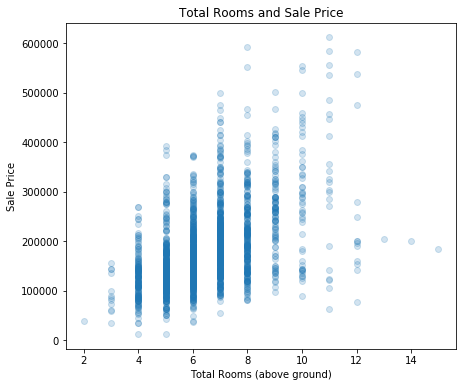

In [104]:
# Plot with rooms available 
plt.figure(figsize = (7, 6))

plt.scatter(train["TotRms AbvGrd"], train["SalePrice"], alpha = 0.2)
plt.title("Total Rooms and Sale Price")
plt.xlabel("Total Rooms (above ground)")
plt.ylabel("Sale Price"); 

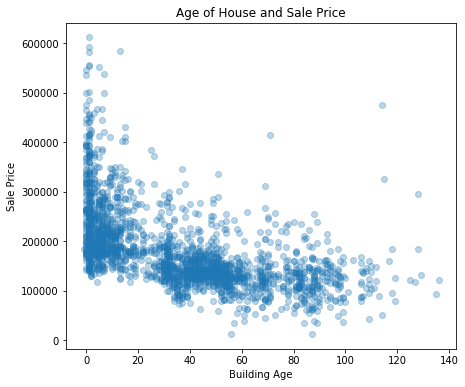

In [105]:
# Plot with house age at sale
plt.figure(figsize = (7, 6))

plt.scatter(train["Age Sold"], train["SalePrice"], alpha = 0.3)
plt.title("Age of House and Sale Price")
plt.xlabel("Building Age")
plt.ylabel("Sale Price"); 

Text(0, 0.5, 'Sale Price')

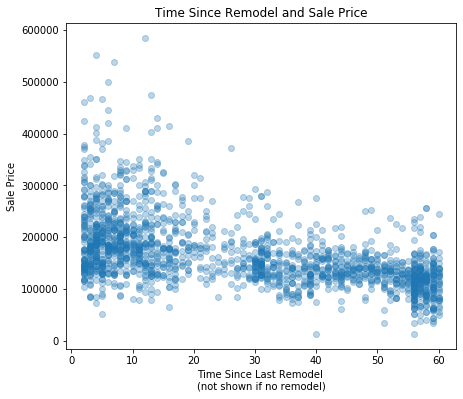

In [108]:
# Plot with time since last remodel 
plt.figure(figsize = (7, 6))

remodel = train[train["Remodel Age"] > 1]

plt.scatter(remodel["Remodel Age"], remodel["SalePrice"], alpha = 0.3)
plt.title("Time Since Remodel and Sale Price")
plt.xlabel("Time Since Last Remodel \n(not shown if no remodel)")
plt.ylabel("Sale Price")

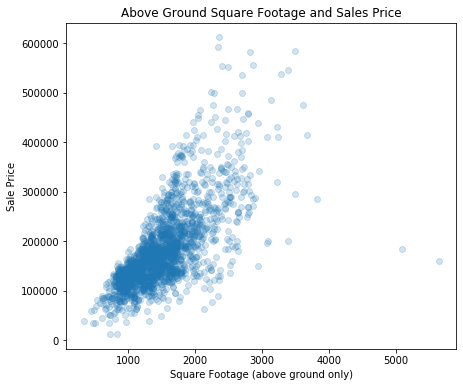

In [78]:
# Plot with square footage (above ground)
plt.figure(figsize = (7, 6))

plt.scatter(train["Gr Liv Area"], train["SalePrice"], alpha = 0.2)
plt.title("Above Ground Square Footage and Sales Price")
plt.xlabel("Square Footage (above ground only)")
plt.ylabel("Sale Price"); 

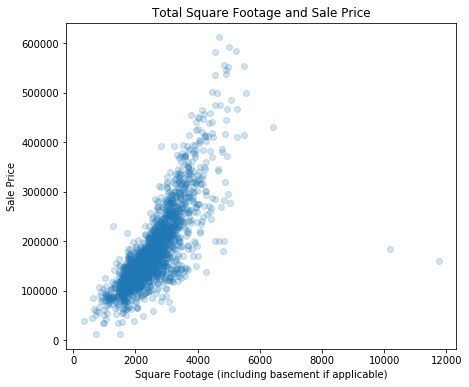

In [100]:
# Plot with total square footage (including basement)
plt.figure(figsize = (7, 6))

plt.scatter((train["Gr Liv Area"] + train["Total Bsmt SF"]), train["SalePrice"], alpha = 0.2)
plt.title("Total Square Footage and Sale Price")
plt.xlabel("Square Footage (including basement if applicable)")
plt.ylabel("Sale Price"); 

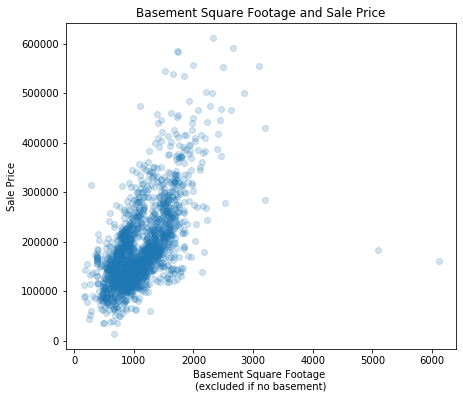

In [110]:
# Plot with basement square footage only
plt.figure(figsize = (7, 6))

basements = train[train["Total Bsmt SF"] > 0]

plt.scatter(basements["Total Bsmt SF"], basements["SalePrice"], alpha = 0.2)
plt.title("Basement Square Footage and Sale Price")
plt.xlabel("Basement Square Footage \n(excluded if no basement)")
plt.ylabel("Sale Price"); 

In [116]:
# Plot neighborhood

neighborhoods = train["Neighborhood"].unique()

for n in range(len(neighborhoods)): 
    str(neighborhoods[n]) = train[train["Neighborhood"] == f"{neighborhoods[n]}"]

SyntaxError: can't assign to function call (<ipython-input-116-420bd19b5ba0>, line 6)

In [115]:
Sawyer

NameError: name 'Sawyer' is not defined

In [114]:
neighborhoods

array(['Sawyer', 'SawyerW', 'NAmes', 'Timber', 'Edwards', 'OldTown',
       'BrDale', 'CollgCr', 'Somerst', 'Mitchel', 'StoneBr', 'NridgHt',
       'Gilbert', 'Crawfor', 'IDOTRR', 'NWAmes', 'Veenker', 'MeadowV',
       'SWISU', 'NoRidge', 'ClearCr', 'Blmngtn', 'BrkSide', 'NPkVill',
       'Blueste', 'GrnHill', 'Greens', 'Landmrk'], dtype=object)

In [50]:
categories = ["Neighborhood", "Bldg Type", "House Style", "Bsmt Cond", "Heating", "Central Air", "Electrical", 
              "Garage Type", "Paved Drive", "Pool QC", "Fence", "Mo Sold"]

In [59]:
neighborhoods = train.groupby("Neighborhood").describe()

<Figure size 864x1800 with 0 Axes>

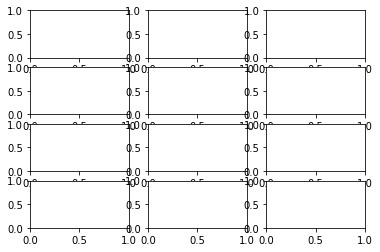

In [52]:
plt.figure(figsize = (12, 25))
fig, (ax) = plt.subplots(nrows = 4, ncols = 3)

count = 0
for r in range(0, 4): 
    for c in range(0, 3): 
        ax[r, c].boxplot(train[f"{categories[count]}"])